# 線形回帰とは

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np



class ScratchLinearRegression:
    
    """
    線形回帰のスクラッチ実装
    
    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue
    
    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      訓練データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証データに対する損失の記録
    """
    
    #コンストラクタ
    def __init__(self,n_iteration,alfa): #★☆★☆初期化するインスタンス変数だけ入れる。ここに入れればメソッドの引数に入れなくてもクラス内メソッドで動作する
                
        self.n_iteration = n_iteration   # イテレーター最急降下を繰り返す回数
        self.alfa = alfa                 # 学習率
        self.θ = np.array(None)         # パラメータベクトル(type:ndarray)この時点でシータの要素数は分からないからナンにしておく
        #self.loss_func = np.array(None)  # 損失関数　平均二乗誤差を1/2した値　その時のθで計算したy_hatとｙの差分（損失）の値（平均２乗誤差の1/2）
        #self.no_bias = no_bias          # バイアス項を入れるかどうか、メソッド呼び出しで定義する
        #self.verbose = verbose          # 学習過程を出力するかどうか、メソッド呼び出しで定義する
        
        # 損失を記録する配列を用意
        self.loss = np.array([])         #イテレータ回数分のゼロが入ったndarray　self.n_iterationの数だけ入るのでその要素数分作っておく。★☆★☆np.empty()じゃダメなのか⇒empty()は適当な数字の配列を作るのでnp.zerosとやってることはかわらない
        self.val_loss = np.array([])
        self.θ_sum = np.array([])
        #print("self.θ_sum:{}".format(self.θ_sum)) #------検証中--------
        

    # 問題6（学習と推定）
    def fit(self,X,y, X_val=None, y_val=None):  # コンストラクタ以外のこのメソッドで使う引数のみ入れる。引数はメソッド呼び出し時定義する。それか、メソッドの引数をインスタンス変数に代入して使いたい時に再度インスタンス変数を定義する。
        """
        線形回帰の学習
        """
        
        #------Xとyについてのfit(学習)についてのコード--------
        #θのndarrayの要素数はXの特徴量の数と同じなので、Xの列数の０が入ったndarrayを作った
        self.θ = np.zeros(X.shape[1])# 
        
        #print("self.θ:{}".format(self.θ))        #------検証中--------
        #print(type(self.θ))                       #------検証中--------
                

        #イテレーション回数最急降下法を行う為のfor文
        for i in range(self.n_iteration):
            
            # ------①　問題1（Xデータとself.θ（初期値ゼロ）を代入＆過程関数（y_hat）の算出）《X θ⇒y_hat》------
            y_hat = self._linear_hypothesis(X) #★☆★☆これは何を表してるのか謎 #self._linear_hypothesis()の値を受け取る
            
            # ------② 問題2（θの算出　最急降下法によるパラメータthetaの更新値計算）------
            self.θ = self._gradient_descent(X,y,y_hat)
            #print("self.θ:{}".format(self.θ))        #------検証中--------
            #np.append(self.θ_sum , self.θ, axis=1)
            #print("self.θ_sum:{}".format(self.θ_sum))        #------検証中--------
            # ------③ 問題3　問題2で新しいself.θが決まった段階で、self.θとXを代入して損失関数を計算する Loss_function（損失関数を出すメソッド）に入れて損失を出す------
            
            
            #------------↓引数Xとその損失関数について------------

            #まずXと②で更新したself.θをpredictに代入してy_hatを出力
            y_hat = self.predict(X) #★☆★☆ここなんでただのpredictじゃ呼べなくてself.predictだと呼べるの？predict() takes 2 positional arguments but 3 were given

            #次に上で出したy_hatを使ってX_trainの損失関数を出力する
            loss_func = self.Loss_function(y_hat, y)

            #Xの損失関数をndarrayに格納
            self.loss = np.append(self.loss , loss_func)
            
            #print("self.loss:{}".format(self.loss)) #------検証中---------
            
            y_val_hat = self.predict(X_val) #self._linear_hypothesis()の値を受け取る
            
            #次に上で出したy_val_hatを使ってX_testの損失関数を出力する
            loss_func = self.Loss_function(y_val_hat, y_val)
            
            #X_valの損失関数を専用のndarrayであるself.val_lossに格納
            self.val_loss = np.append(self.val_loss,loss_func)
            
            #------------↑------------
            
            
        #------X_valとy_valについてのfit(学習)についてのコード--------

        #self.θ = np.zeros(X_val.shape[1])# Xのaxis=1の要素数を取得してシータをゼロで初期化した。
        #print("self.θ:{}".format(self.θ))        #------検証中--------
        #print(type(self.θ))                       #------検証中--------


        #イテレーション回数最急降下法を行う為のfor文
        #print("X_valデータ回すときのi:{}".format(i)) #------検証中--------
        #i = 0
        
        #         for i in range(self.n_iteration):

        #             # ------①　問題1（X_valデータとself.θ（初期値ゼロ）を代入＆過程関数（y_val_hat）の算出）《X θ⇒y_hat》------
        #             y_val_hat = self._linear_hypothesis(X_val) #self._linear_hypothesis()の値を受け取る

        #             # ------② 問題2（θの算出　最急降下法によるパラメータthetaの更新値計算）------
        #             # self.θ = self._gradient_descent(X_val,y_val,y_val_hat)

        #             # ------③ 問題3　問題2で新しいself.θが決まった段階で、self.θとXを代入して損失関数を計算する Loss_function（損失関数を出すメソッド）に入れて損失を出す------


        #             #------------↓引数X_valとその損失関数について------------

        #             #まずX_valと②で更新したself.θをpredictに代入してy_val_hatを出力
        #             #y_val_hat = self.predict(X_val) #★☆★☆ここなんでただのpredictじゃ呼べなくてself.predictだと呼べるの？predict() takes 2 positional arguments but 3 were given

        #             #次に上で出したy_val_hatを使ってX_testの損失関数を出力する
        #             loss_func = self.Loss_function(y_val_hat, y_val)

        #             #X_valの損失関数を専用のndarrayであるself.val_lossに格納
        #             self.val_loss = np.append(self.val_loss,loss_func)

        #             #print("type(self.val_loss):{}".format(type(self.val_loss)))------検証中---------

        #             #------------↑------------

            
            
    #問題7　【グラフ描画】トレーニングデータとテストデータの損失関数　横軸にイテレーション回数縦軸に損失関数
    def Learnig_curve(self):

        #self.lossの要素数をndarrayにした。散布図のX座標で使う為
        num = np.arange(len(self.loss))
        num_val = np.arange(len(self.val_loss))
        
        #print("num:{}".format(num))
        #print("self.loss:{}".format(self.loss))
        #print("num_val:{}".format(num))
        #print("self.val_loss:{}".format(self.val_loss))

        #散布図の描画
        plt.scatter(num, self.loss,color = "red" )
        plt.scatter(num_val, self.val_loss, color = "blue")
        plt.colorbar()
        plt.grid()
        return plt.show()



        

    # 問題1
    def _linear_hypothesis(self,X):  # 必要に応じて引数を追加して下さい
        """
        線形の仮定関数を計算する
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          訓練データ
          
        θ: パラメータベクトル
        
        Xj : j番目の特徴量
        θj: j番目のパラメータ（重み）
        
        Returns
        -------
        次の形のndarray, shape (n_samples, 1)
        線形の仮定関数による推定結果
        """
        
        #1次元配列は転置できないのでreshapeで２次元に変えてから転置する
        θ_2dim = self.θ.reshape(( 1, len(self.θ)))
        #print(θ_2dim.transpose())
        
        #n個の特徴量の仮定関数hθにおける特徴量をXjとし一般式としたもの
        y_hat = X @ θ_2dim.transpose()  #★☆★☆仮定関数★☆★☆y_hatはすでに計算済みで１次元のndarrayで出てくる。X @ θ_2dim.transpose()の順番にしたのは野田氏メモ参照
        
        
        return y_hat
        
    # 問題2
    #仮定関数を最適化するパラメータθを出力するメソッド
    def _gradient_descent(self,X,y,y_hat): #θやalfaはインスタンス変数で定義しているのでここの引数に入れなくていい
                        
        """
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          訓練データ
        alfa : 学習率
        error : y_hatとｙの差分
        
        Returns
        -------
        次の形のndarray, shape (n_samples, 1)
        線形の仮定関数による推定結果
        説明を記述
        """
        #データの数（行の数）
        m = len(X[:,0])
        
        #特徴量の数（列の数）
        n = len(X[0,:])
                        
        #-------------パラメータθを再急降下法で最適化する一般式-----------

        #error(予測値と真の値の差分）のデータ数iの値を１～ｍまで（データ数ある分だけ）合計し、θの一般式self.θ[j] を出して、それを特徴量の数ｎ個分をfor文で作り出す
        for j in range(n): # n:特徴量の数（列の数） 
            
            #error(予測値と真の値の差分）にX[i,j]を掛けた値をｍ（データ数の数）個分足すので、足した変数をsum_errorとする
            sum_error = 0 #とりあえず定義（初期値）for文の為。値はゼロ
            
            #ここはerrorをｍ個作ってそれをsum_errorに足していく
            for i in range( m ): 
                
                #error(予測値と真の値の差分）
                error =y_hat[i] - y[i]
                
                #sum_errorはデータ数（ｍ）分　error * X[i,j]を繰り返し足し続けた合計値
                sum_error += error * X[i,j] #Σi=0~m　((hθ_Xj) - yi)を全部足した
                
            #最急降下法による次の地点を求める一般式。ここでθを0からｎ個作っていく
            self.θ[j] = self.θ[j] - self.alfa * sum_error / m #ここは公式通り。θは２次元ｍ行０列の配列。特徴量の数ｊをｎ個分forして特徴量の数だけself.θ［ｊ］が入ったself.θができた。
            
        return  self.θ #self.θ[j]を出力してもいいが、下の問題３ではreturnしなくても同じクラス内なのでself.θ[j]は使えるのでNoneとした
        
    # 問題3
    # 更新されたself.θと引数Xを仮定関数に代入して推定する（y_hatを主力する）
    def predict(self, X):
        """
        線形回帰での推定
        最適化したθが代入された仮定関数に検証データを入力推定値を算出する
        線形回帰を使い推定する。
        
        Parameters
        ----------
        X_test : 次の形のndarray, shape (n_samples, n_features)
            サンプル
        
        Returns
        -------
        次の形のndarray, shape (n_samples, 1)
        線形回帰による推定結果

        """
        #更新されたself.θを２次元に変えてから転置する
        θ_2dim = self.θ.reshape(( 1, len(self.θ)))
        #print(θ_2dim.transpose())
        
        #n個の特徴量の仮定関数hθにおける特徴量をXjとし一般式としたもの
        y_hat = X @ θ_2dim.transpose()  #★☆★☆仮定関数★☆★☆y_hatはすでに計算済みで１次元のndarrayで出てくる。X @ θ_2dim.transpose()の順番にしたのは野田氏メモ参照
        
        return y_hat
    

    # 問題5
    #目的関数（損失関数）は平均二乗誤差を1/2した値のこと
    def Loss_function(self,y_pred, y):
        """
        損失関数
        """
        #データの数（行の数）
        m = len(y_pred)
        #         print("m:{}".format(m))
        #         print("type(m):{}".format(type(m)))
        #         print("y_pred:{}".format(y_pred))
        #         print("y:{}".format(y))
        
        #平均二乗誤差mseを定義
        mse = 0
        sum_error = 0
        #         print("y_predのデータです:{}".format(y_pred))
        #         print("y_predのデータサイズです:{}".format(y_pred.size))
        #         print("yのデータです:{}".format(y))
        #         print("yのデータサイズです:{}".format(y.size))
        

        #平均二乗誤差を計算
        for i in range(m):
            error = (y_pred[i] - y[i] )**2
            sum_error += error
            # print("i:{} ,y_pred[i]:{} , y[i]:{}".format(i,y_pred[i],y[i]))# ------検証中--------
            # print("sum_error:{} ".format(sum_error))# ------検証中--------
            # print("\n")# ------検証中--------
        
        #平均二乗誤差を1/2して損失関数を出す
        self.loss_func = sum_error / 2 * m
        
        #損失関数を出力する
        return self.loss_func

#------------↑クラスはここまで-----------



# 問題4(ここは使ってない)
# ２つの目的変数（y_predとy）の平均二乗誤差を求める関数
def MSE(y_pred, y):
    """
    平均二乗誤差の計算
    Parameters
    ----------
    y_pred : 次の形のndarray, shape (n_samples,)
      推定した値
    y : 次の形のndarray, shape (n_samples,)
      正解値
    Returns
    ----------
    mse : numpy.float
      平均二乗誤差
    """
    
    #データの数（行の数）
    m = len(y_pred)
    # print("m:{}".format(m))
    
    #平均二乗誤差mseを定義
    mse = 0
    sum_error = 0
    
    #平均二乗誤差を計算
    for i in range(m):
        error = (y_pred[i] - y[i] )**2
        sum_error += error
        print("i:{} ,y_pred[i]:{} , y[i]:{}".format(i,y_pred[i],y[i]))
        print("sum_error:{} ".format(sum_error))
    mse = sum_error / m
    print("sum:{} ".format(mse))    
    
    return mse
    




### 【問題6】学習と推定
機械学習スクラッチ入門のSprintで用意したHouse Pricesコンペティションのデータに対してスクラッチ実装の学習と推定を行なう。

In [2]:
#-------------House Pricesデータセットを学習・推定-----------

#　library
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

#　データフレームのインポートと前処理
df = pd.read_csv("train.csv") 
df_selected = df.loc[:, ["GrLivArea", "YearBuilt", "SalePrice"]]
df_selected.head()



,GrLivArea,YearBuilt,SalePrice
0,1710,2003,208500
1,1262,1976,181500
2,1786,2001,223500
3,1717,1915,140000
4,2198,2000,250000


In [3]:
#-------------GrLivArea　・　YearBuilt　だけを標準化する。-----------

#データフレームのコピーを作成
scaled_features = df_selected.copy()

#標準化する２つのカラムを定義する
col_names = ['GrLivArea', 'YearBuilt']

#featuresとして、標準化するカラムのみのデータフレームを作る
features = scaled_features[col_names]

#scalerという変数でStandardScalerクラスをインスタンス化
scaler = StandardScaler().fit(features.values) #データフレームをndarrayに変換する.valuesメソッド

#featuresという変数でscalerクラスのtransformメソッド（標準化）を呼び出し
features = scaler.transform(features.values) #データフレームをndarrayに変換する.valuesメソッド

#上のscaled_features[col_names]に標準化したデータfeatures を上書き
scaled_features[col_names] = features

#出力
print("・GrLivAreaとYearBuiltを標準化したデータフレーム \n")

#scaled_featuresのGrLivAreaとYearBuiltは標準化された上書きデータが代入された為、使用DFはscaled_features
print(scaled_features)


・GrLivAreaとYearBuiltを標準化したデータフレーム 

      GrLivArea  YearBuilt  SalePrice
0      0.370333   1.050994     208500
1     -0.482512   0.156734     181500
2      0.515013   0.984752     223500
3      0.383659  -1.863632     140000
4      1.299326   0.951632     250000
...         ...        ...        ...
1455   0.250402   0.918511     175000
1456   1.061367   0.222975     210000
1457   1.569647  -1.002492     266500
1458  -0.832788  -0.704406     142125
1459  -0.493934  -0.207594     147500

[1460 rows x 3 columns]


In [4]:
#-------------訓練データと検証データに分割-----------

from sklearn.model_selection import train_test_split

#train_test_splitに代入してデータを分ける為、特徴量のDFと目的変数のDFに分割する
X = scaled_features.loc[: , ['GrLivArea','YearBuilt']] #[]の中に[]をつけているのでタイプはDFになる。
y = scaled_features.loc[: , ['SalePrice']]

# #データフレームの小数点を表示しない
# pd.options.display.float_format = '{:.0f}'.format

#特徴量X［j=0］（切片orバイアス項と呼ぶ）を作るために［j=0］＝1の行をデータの数分のndarrayを作りDFに変換する
#バイアス項の名前を指定
column = ["bias"]
df_bias =pd.DataFrame(np.ones(len(X)),columns=column)
#print("df_bias:{}".format(df_bias))

#concatでバイアス項とX訓練用データを結合しバイアス項が入った訓練用データができた
X = pd.concat([df_bias,X], axis=1)

print("Xのバイアス項追加:\n{}".format(X))

#自作scratch_train_test_splitは入力X、yがndarrayを想定している為、DFをndarrayに変換
X = X.values #.valuesメソッドでndarrayに変換
y = y.values #.valuesメソッドでndarrayに変換

#train_test_split訓練データと検証データに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True
)

#print("X_train:{}".format(X_train))
#print(" X_test:{}".format( X_test))
#print("y_train:{}".format(y_train))
#print("y_test:{}".format(y_test))


Xのバイアス項追加:
      bias  GrLivArea  YearBuilt
0      1.0   0.370333   1.050994
1      1.0  -0.482512   0.156734
2      1.0   0.515013   0.984752
3      1.0   0.383659  -1.863632
4      1.0   1.299326   0.951632
...    ...        ...        ...
1455   1.0   0.250402   0.918511
1456   1.0   1.061367   0.222975
1457   1.0   1.569647  -1.002492
1458   1.0  -0.832788  -0.704406
1459   1.0  -0.493934  -0.207594

[1460 rows x 3 columns]


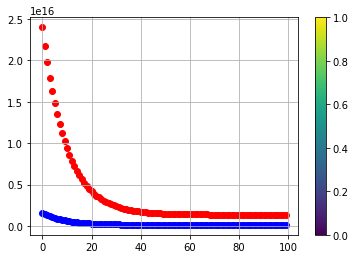

In [5]:
#-------------【訓練用トレーニングデータの代入】スクラッチ実装の学習-----------

# debug code試験的にデータ数を制限する
# X_train = X_train[:15]
# y_train = y_train[:50]
# X_test = X_test[:50]
# y_test = y_test[:50]

#House Pricesという名前でコンペティションクラスを定義
house_price = ScratchLinearRegression(n_iteration=100,alfa = 0.05)

#house_priceクラスのfitメソッドで訓練用データを学習。パラメータθを算出
house_price.fit(X_train,y_train,X_test, y_test)

#学習曲線を描く関数を呼び出し
house_price.Learnig_curve()


In [6]:
#-------------スクラッチ実装の推定　＆　scikit-learnによる実装との比較-----------

y_hat_test = house_price.predict(X_test)
print("y_hat_test:{}".format(y_hat_test))


y_hat_test:[[263360.57725362]
 [154641.69733194]
 [127061.59109737]
 [235549.50958828]
 [137861.49404834]
 [ 67887.76305043]
 [211686.77900118]
 [130535.9909381 ]
 [496595.99065891]
 [172974.72001262]
 [199635.28577301]
 [200873.2763628 ]
 [254466.16837659]
 [114837.84043699]
 [113090.55342242]
 [145220.08709379]
 [241324.46255349]
 [151615.16997992]
 [146068.45850801]
 [152147.1272754 ]
 [147033.10329334]
 [147989.13758081]
 [102437.9777809 ]
 [199914.07145243]
 [218085.03251023]
 [109754.63713808]
 [215169.33865436]
 [ 91381.04865036]
 [234704.99273757]
 [125237.69514789]
 [191700.53249177]
 [227800.16274124]
 [127394.77552643]
 [276649.61038617]
 [269971.43657168]
 [198539.63330312]
 [219160.06010629]
 [118238.35128029]
 [269521.9787715 ]
 [312152.45552602]
 [221003.44630357]
 [147676.57802558]
 [194469.5829788 ]
 [245177.15113445]
 [330106.05484044]
 [193184.21882578]
 [ 95049.46542315]
 [123555.68663288]
 [203236.83873479]
 [ 96070.09426958]
 [325985.46032999]
 [129787.12258468]
 

In [7]:
#-------------既存の線形回帰》による学習と予測-----------


from sklearn.linear_model import LinearRegression

#訓練用データのデータを用意
X = X_train
y = y_train

# 予測モデルを作成
clf = LinearRegression().fit(X, y)

# 決定係数
clf.score(X, y)

# 回帰係数
clf.coef_

# 切片 (誤差)
clf.intercept_

#予測モデルに検証用のXを代入してｙの予測データを作成
y_test_pred2 = clf.predict(X_test)

#小数点以下の値を切り捨て
y_test_pred1 = np.floor(y_test_pred2)

#小数点切り捨てはfloatなのでintに変換
y_test_pred = y_test_pred1.astype(int)

print(y_test_pred.shape)
print(type(y_test_pred))  #★☆★☆予測したデータはndarrayで出てきた。DFとndarrayで検証とかしていいの？

#ｙの予測したデータを出力
print("ｙの予測したデータ\n{}".format(y_test_pred))

print("\n")

#ｙの実際のデータをndarrayに変換（予測したデータがndarrayなのと、グラフはndarrayを使う為）
y_test_ndarray = np.array(y_test)
print(y_test_ndarray.shape)
print(type(y_test_ndarray))
print("\n")

#ｙの実際のデータを出力
print("ｙの実際のデータ\n{}".format(y_test_ndarray))



(292, 1)
<class 'numpy.ndarray'>
ｙの予測したデータ
[[264908]
 [155745]
 [127984]
 [236857]
 [138726]
 [ 68733]
 [212720]
 [131544]
 [499072]
 [173836]
 [200616]
 [202018]
 [255750]
 [115611]
 [113956]
 [146194]
 [242581]
 [152425]
 [146999]
 [153376]
 [148042]
 [148729]
 [103172]
 [200959]
 [219323]
 [110951]
 [216257]
 [ 92025]
 [235851]
 [126167]
 [192895]
 [228986]
 [128172]
 [278036]
 [271283]
 [199567]
 [220241]
 [119002]
 [270858]
 [313743]
 [222382]
 [148673]
 [195430]
 [246389]
 [331778]
 [194354]
 [ 95790]
 [124324]
 [204382]
 [ 96863]
 [327596]
 [130644]
 [168851]
 [ 77657]
 [211901]
 [116980]
 [109260]
 [243964]
 [133321]
 [ 84994]
 [126698]
 [118867]
 [138484]
 [137419]
 [220531]
 [162405]
 [107005]
 [237325]
 [ 91270]
 [235174]
 [206455]
 [104155]
 [104451]
 [208272]
 [110168]
 [229677]
 [120227]
 [ 80813]
 [309301]
 [152246]
 [132612]
 [123427]
 [100858]
 [152425]
 [309976]
 [196031]
 [ 92882]
 [201163]
 [189879]
 [124098]
 [224963]
 [191540]
 [203673]
 [246793]
 [191324]
 [14326

In [8]:
#トイデータの遊び

# import numpy as np

# x = np.linspace(1,6,5)
# X = np.c_[np.ones(5),x]#入力データX

# y = 2*x + 1#適当な真のモデル
# # print("Xの行数:\n{}".format(X))
# # print("yの行数:\n{}".format(y))

# #jyutakuクラスを定義
# jyutaku = ScratchLinearRegression(n_iteration=100,alfa = 0.1)

# jyutaku.fit(X,y)



In [9]:
#トイデータの遊び

# import numpy as np
# y_pred = np.array([0,1,2,3,4,5])
# y = np.array([1,3,5,7,9,11])



# # #jyutakuクラスを定義
# jyutaku = ScratchLinearRegression(n_iteration=100,alfa = 0.1)

# jyutaku.mse = MSE(y_pred, y)
# self.loss_func = Loss_function
# print(loss_func)
# print("loss_func:{}".format(loss_func))

# # #jyutaku.predict(X)   
# # y_hat_test = predict(self, X_test)